In [ ]:
import os
import random
import shutil

def is_image_file(filename):
    # Check if the file has a valid image extension
    valid_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}
    _, ext = os.path.splitext(filename)
    return ext.lower() in valid_extensions

def copy_random_image(source_dir, destination_dir):
    # Ensure the destination directory exists
    os.makedirs(destination_dir, exist_ok=True)
    
    # Iterate over each subfolder in the source directory
    for subfolder in os.listdir(source_dir):
        subfolder_path = os.path.join(source_dir, subfolder)
        
        if os.path.isdir(subfolder_path):
            # List all valid image files in the subfolder
            files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f)) and is_image_file(f)]
            
            if files:
                # Select a random file
                random_file = random.choice(files)
                source_file_path = os.path.join(subfolder_path, random_file)
                
                # Define the destination file path
                destination_file_path = os.path.join(destination_dir, f"{subfolder}{os.path.splitext(random_file)[1]}")
                
                # Copy the random file to the destination directory
                shutil.copy(source_file_path, destination_file_path)
                print(f"Copied {random_file} from {subfolder} to {destination_file_path}")
            else:
                print(f"No valid image files found in subfolder {subfolder}")
        else:
            print(f"{subfolder_path} is not a directory")

# Example usage
source_directory = '/Volumes/T7_shield/CryptoVision/Clustering/ID2403271942/Clustered_species_dataset'
destination_directory = '/Volumes/T7_shield/CryptoVision/Clustering/ID2403271942/reference_images_full'

copy_random_image(source_directory, destination_directory)

In [ ]:
from tensorflow.keras.models import load_model

# Load the .keras model
model_path = '/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_MOBv2_S930_202407042018/model.keras'
model = load_model(model_path)

# Save the model in .h5 format
model.save('/Users/leonardo/Documents/Projects/crypto_vision/models/BV_label_MOBv2_S930_202407042018/model.h5')

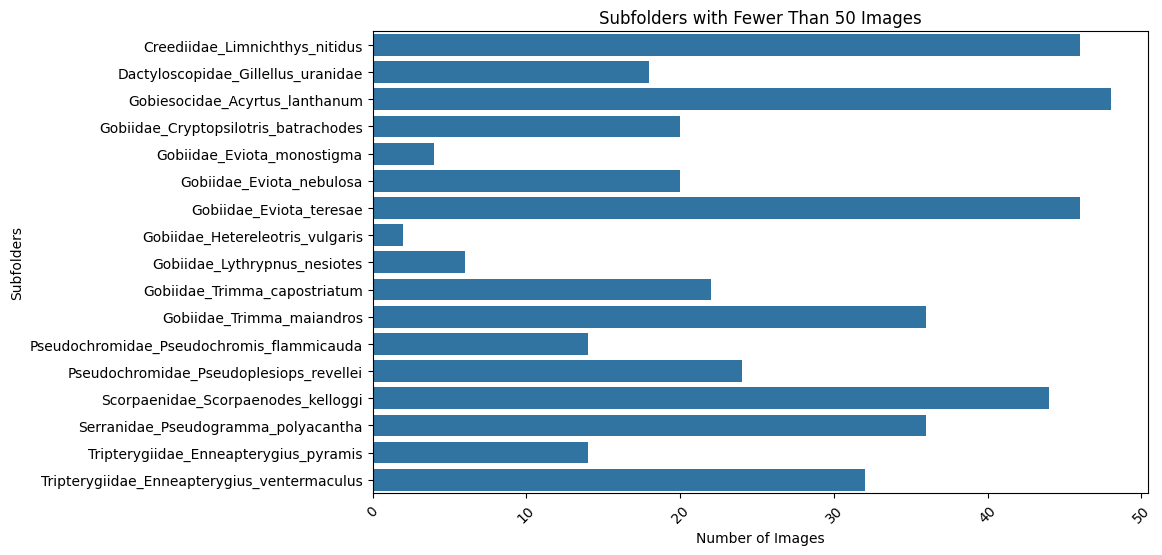

In [2]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

def count_images_in_subfolders(folder_path):
    # Dictionary to store the count of images in each subfolder
    image_counts = Counter()

    # Supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff'}

    # Walk through the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                subfolder = os.path.basename(root)
                image_counts[subfolder] += 1

    return image_counts

def plot_image_counts(image_counts, threshold):
    # Filter the counts by the given threshold
    filtered_counts = {k: v for k, v in image_counts.items() if v < threshold}
    
    if not filtered_counts:
        print("No subfolders with fewer than {} images.".format(threshold))
        return

    # Sort counts by subfolder names
    subfolders, counts = zip(*sorted(filtered_counts.items()))

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(subfolders))
    plt.ylabel('Subfolders')
    plt.xlabel('Number of Images')
    plt.title(f'Subfolders with Fewer Than {threshold} Images')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
#folder_path = '/Volumes/T7_shield/CryptoVision/Clustering/ID2403271942/Clustered_species_dataset'
folder_path = '/Volumes/T7_shield/CryptoVision/Misc/google_images_source'
threshold = 50  # Specify the threshold value here
image_counts = count_images_in_subfolders(folder_path)
plot_image_counts(image_counts, threshold)